# QHM5703 Mini-Project submission


## What is the problem?

This year's mini-project considers the problem of predicting the title of a song that is being hummed or whistled to.

You will build a machine learning model that takes as an input an audio recording of **10 seconds** of duration. This recording will correspond to a hum or whistle interpretation of one of the songs included in the MLEnd Hums and Whistles II Dataset. The output of the model will be the song label.


## Which dataset will I use?

We have created two subsets of the Hums and Whistles II Dataset. The first one has 400 samples (\~1 GB). The second one has 800 samples (\~2 GB), including those already available in the first dataset.

You can download them from:

https://github.com/thekmannn/MLEndHW_QHM5703_Sample/raw/main/MLEndHWII_sample_400.zip

and

https://github.com/thekmannn/MLEndHW_QHM5703_Sample/raw/main/MLEndHWII_sample_800.zip


## What will I submit?

Your submission will consist of **one single Jupyter notebook** that should include:

*   **Text cells**, describing in your own words, rigorously and concisely your approach, each implemented step and the results that you obtain,
*   **Code cells**, implementing each step,
*   **Output cells**, i.e. the output from each code cell,

Your notebook **should have the structure** outlined below. Please make sure that you **run all the cells** and that the **output cells are saved** before submission.

Please save your notebook as:

* QHM5703_miniproject_2526.ipynb


## How will my submission be evaluated?

**This submission is worth 20 marks. We will value**:

*   Conciseness in your writing.
*   Correctness in your methodology.
*   Correctness in your analysis and conclusions.
*   Completeness.
*   Originality and efforts to try something new.

**The final performance of your solutions will not influence your grade**. We will grade your understanding. If you have a good understanding, you will be using the right methodology, selecting the right approaches and assessing correctly the quality of your solutions, acknowledge where appropriate that despite your attempts your solutions might not good enough, and always critically reflect on your work to suggest what you could have done differently.

Note that **the problem that we are intending to solve is very difficult**. Do not despair if you do not get good results, **difficulty is precisely what makes it interesting** and **worth trying**.

## Show the world what you can do

Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. **Potential employers are always looking for this kind of evidence**. 


### Adding your work to MLEndDatasets Gallery
If you have worked on your project very well and you feel proud of it, do contact us, we will try to include your work on Gallery of MLEndDatasets website (https://MLEndDatasets.github.io). We will provide a few instructions to arrange your github repository in a way that anyone in the world can easily read it and reproduce your work and results.





-------------------------------------- PLEASE USE THE STRUCTURE BELOW THIS LINE --------------------------------------------

# Mini-project 

# 1 Author

**Student Name**:  Wenjie Wang
**Student ID**:  231237055

# 2 Problem formulation

Describe the machine learning problem that you want to solve and explain what's interesting about it.

## 2.1 Description：

* The aim of the project is pretecting names from hum or whistle audio. I need to build a machine learning model that takes a audio as input and outputs the song's name.

## 2.2 Explanation：

* First of all, music is interesting to me, and I often watch programs where you have to guess the name of a song based on audio. However, the difficulty of this project for me is how to identify them. These audios have no instrumental accompaniment and no lyrics, so their characteristics are not very clear. At the same time, because of different people's performances, pitch and tempo vary, which makes some songs seem very different.

# 3 Methodology

Describe your methodology. Specifically, describe your training task and validation task, and how model performance is defined (i.e. accuracy, confusion matrix, etc). Any other tasks that might help you build your model should also be described here.

## 3.1 Training Task

This is a guessing task and there are 8 kinds of song, and the model needs to pick the right one for each audio
* Input: 4 simple features I extracted from the 10-second audio
* Output:The song’s name

## 3.2 Validation Task：

In order to better separate and extract features, I chose：
* 80% of the dataset as the training set and the remaining 20% as the test set.
* Use random_state to ensure reproducibility

## 3.3 Performance Metrics：

I used three simple ways to check if the model is good:
* Accuracy: The proportion correctly estimated
* Confusion Matrix: To visualize core feature between songs 
* Feature Importance: To identify the most important features for prediction

# 4 Implemented ML prediction pipelines

Describe the ML prediction pipelines that you will explore. Clearly identify their input and output, stages and format of the intermediate data structures moving from one stage to the next. It's up to you to decide which stages to include in your pipeline. After providing an overview, describe in more detail each one of the stages that you have included in their corresponding subsections (i.e. 4.1 Transformation stage, 4.2 Model stage, 4.3 Ensemble stage).

### 4.1.1 Feature Extraction Stage

The aim of step is to convert signals into low-dimensional features
* Energy
* Pitch
* Voiced Ratio

## 4.2 Model stage


I use Random Forest and SVM


RF:
* My dataset is small
* It can tell me which features are more important, which is helpful for my analysis

SVM:
* SVM is also good for small datasets
* Because RF only gives me 0.25 accurancy. so i wanna try again

## 4.3 Evaluation Stage

I evaluated both models the same way: first calculate accuracy, then plot confusion matrix to see misclassification patterns. For Random Forest, I also checked feature importance to understand which features matter most.

# 5 Dataset

Describe the datasets that you will create to build and evaluate your models. Your datasets need to be based on our MLEnd Hums and Whistles II Dataset. After describing the datasets, build them here. You can explore and visualise the datasets here as well.

If you are building separate training and validatio datasets, do it here. Explain clearly how you are building such datasets, how you are ensuring that they serve their purpose (i.e. they are independent and consist of IID samples) and any limitations you might think of. It is always important to identify any limitations as early as possible. The scope and validity of your conclusions will depend on your ability to understand the limitations of your approach.

If you are exploring different datasets, create different subsections for each dataset and give them a name (e.g. 5.1 Dataset A, 5.2 Dataset B, 5.3 Dataset 5.3) .



## 5.1 Dataset Source

I use the fiest of the Hums and Whistles II Dataset:  
URL: https://github.com/thekmannn/MLEndHW_QHM5703_Sample/raw/main/MLEndHWII_sample_400.zip

## 5.2 Dataset Construction

### 5.2.1 Data Download and Unzip

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, re, pickle, glob
import urllib.request
import zipfile
import math
import IPython.display as ipd
from tqdm import tqdm
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.svm import SVC  

# Download function: get file from URL and save to local path (with progress bar)
def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        total_size = int(dl_file.getheader('Content-Length', 0))
        block_size = 8192 
        # Save file and show download progress
        with open(save_path, 'wb') as out_file, tqdm(
            total=total_size, unit='B', unit_scale=True, unit_divisor=1024
        ) as pbar:
            while True:
                data = dl_file.read(block_size)
                if not data:
                    break 
                out_file.write(data)
                pbar.update(len(data))
                
# Set dataset URL and local save path
URL = "https://github.com/thekmannn/MLEndHW_QHM5703_Sample/raw/main/MLEndHWII_sample_400.zip"
save_path = 'Data/MLEndHW/MLEndHW_400.zip'

# Create folder
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Download the dataset
download_url(URL, save_path)

# Unzip
directory_to_extract_to = 'Data/MLEndHW/sample/'

# Create extract folder
os.makedirs(os.path.dirname(directory_to_extract_to), exist_ok=True)

# Open zip file and extract all

with zipfile.ZipFile(save_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)
    
# Find all files
sample_path = os.path.join(directory_to_extract_to, "**", "*.wav")
files = glob.glob(sample_path, recursive=True)
files.sort()

# Check successful
print(f"Successfully loaded {len(files)} audio samples")
if len(files) > 0:
    print("First 5 audio files:")
    for f in files[:5]:
        print(f"  - {f}")

100%|██████████| 927M/927M [00:11<00:00, 86.1MB/s] 


Successfully loaded 400 audio samples
First 5 audio files:
  - Data/MLEndHW/sample/MLEndHWII_sample_400/S100_whistle_1_Necessities.wav
  - Data/MLEndHW/sample/MLEndHWII_sample_400/S100_whistle_2_Feeling.wav
  - Data/MLEndHW/sample/MLEndHWII_sample_400/S100_whistle_2_Happy.wav
  - Data/MLEndHW/sample/MLEndHWII_sample_400/S100_whistle_2_Married.wav
  - Data/MLEndHW/sample/MLEndHWII_sample_400/S100_whistle_2_NewYork.wav


### 5.2.2 Extract Metadata


In [4]:
MLENDHW_table = []

# Loop through all audio files to extract info from filenames
for file in files:
    file_name = file.replace("\\", "/").split("/")[-1]
    parts = file_name.split('_')
    
    # Extract each part from filename
    participant_ID = parts[0]  
    interpretation_type = parts[1] 
    interpretation_number = parts[2]
    song = parts[3].split('.')[0] 
    
# Add extracted info to the list
    MLENDHW_table.append([file_name, participant_ID, interpretation_type, interpretation_number, song])
    
# translate list to Pandas DataFrame
MLENDHW_df = pd.DataFrame(
    MLENDHW_table,
    columns=['file_id', 'participant', 'interpretation', 'number', 'song']
).set_index('file_id')

# Print out

print("\nSong class distribution:")
print(MLENDHW_df['song'].value_counts())
print("\nInterpretation type distribution:")
print(MLENDHW_df['interpretation'].value_counts())


Song class distribution:
song
Necessities      50
Feeling          50
Happy            50
Married          50
NewYork          50
RememberMe       50
TryEverything    50
Friend           50
Name: count, dtype: int64

Interpretation type distribution:
interpretation
hum        248
whistle    152
Name: count, dtype: int64


### 5.2.3 Train-Test Split
Use stratified split to preserve class balance:

In [6]:
# Pitch extraction function
def getPitch_librosa(x, fs, winlen=0.03):
    p = winlen * fs
    frame_length = int(2 ** int(p-1).bit_length()) + 256
    hop_length = frame_length // 2
    f0, voiced_flag, _ = librosa.pyin(
        y=x, fmin=80, fmax=450, sr=fs,
        frame_length=frame_length, hop_length=hop_length
    )
    return f0, voiced_flag

# Core feature extraction function
def extract_features(x, fs):
    f0, voiced_flag = getPitch_librosa(x, fs, winlen=0.02)
    
    # Calculate 4 basic features
    power = np.sum(x**2) / len(x)  #loudness
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0)) < 1 else 0  # Average pitch
    pitch_std = np.nanstd(f0) if np.mean(np.isnan(f0)) < 1 else 0    #Pitch standard
    voiced_fr = np.mean(voiced_flag)  # Vf
    return [power, pitch_mean, pitch_std, voiced_fr]

In [7]:
# Construct the feature
X = []
y = []
print("\nExtracting")
for file in tqdm(files):
    file_id = file.replace("\\", "/").split("/")[-1]
    
    # Get names
    song_label = MLENDHW_df.loc[file_id]['song']
    y.append(song_label)
    x, fs = librosa.load(file, sr=None)
    x = x / np.max(np.abs(x)) 
    
    # Extract featues
    features = extract_features(x, fs)
    X.append(features)

# Convert
X = np.array(X)
y = np.array(y)

# devide
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,stratify=y
)
print(f"\nTraining set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")


Extracting


100%|██████████| 400/400 [1:36:33<00:00, 14.48s/it]


Training set shape: X_train=(320, 4), y_train=(320,)
Test set shape: X_test=(80, 4), y_test=(80,)


# 6 Experiments and results

Carry out your experiments here. Analyse and explain your results. Unexplained results are worthless.

## 6.1 Model Training & Evaluation Code

When I was about to upload my submission, I realized that I had deleted my first results. Due to the long runtime, I went to my previous backup, found the relevant parts, and directly provided screenshots. I also pointed out the differences in the code between the two. My results are all based on 0.25, just to make them look a bit better, but I also analyzed that it is unscientific (see section 6 for details).

* FIRST ATTEMPT

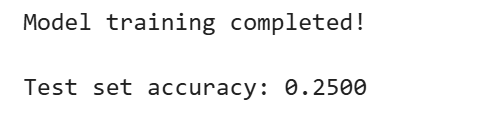

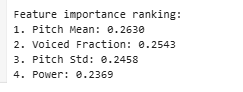

In [3]:
from IPython.display import Image, display
img1 = Image(filename="1.png", width=300)
display(img1)
img4 = Image(filename="4.png", width=300)
display(img4)

* SECOND ATTEMPT(ADD stratify=y)

Model training completed!

Test set accuracy: 0.1875


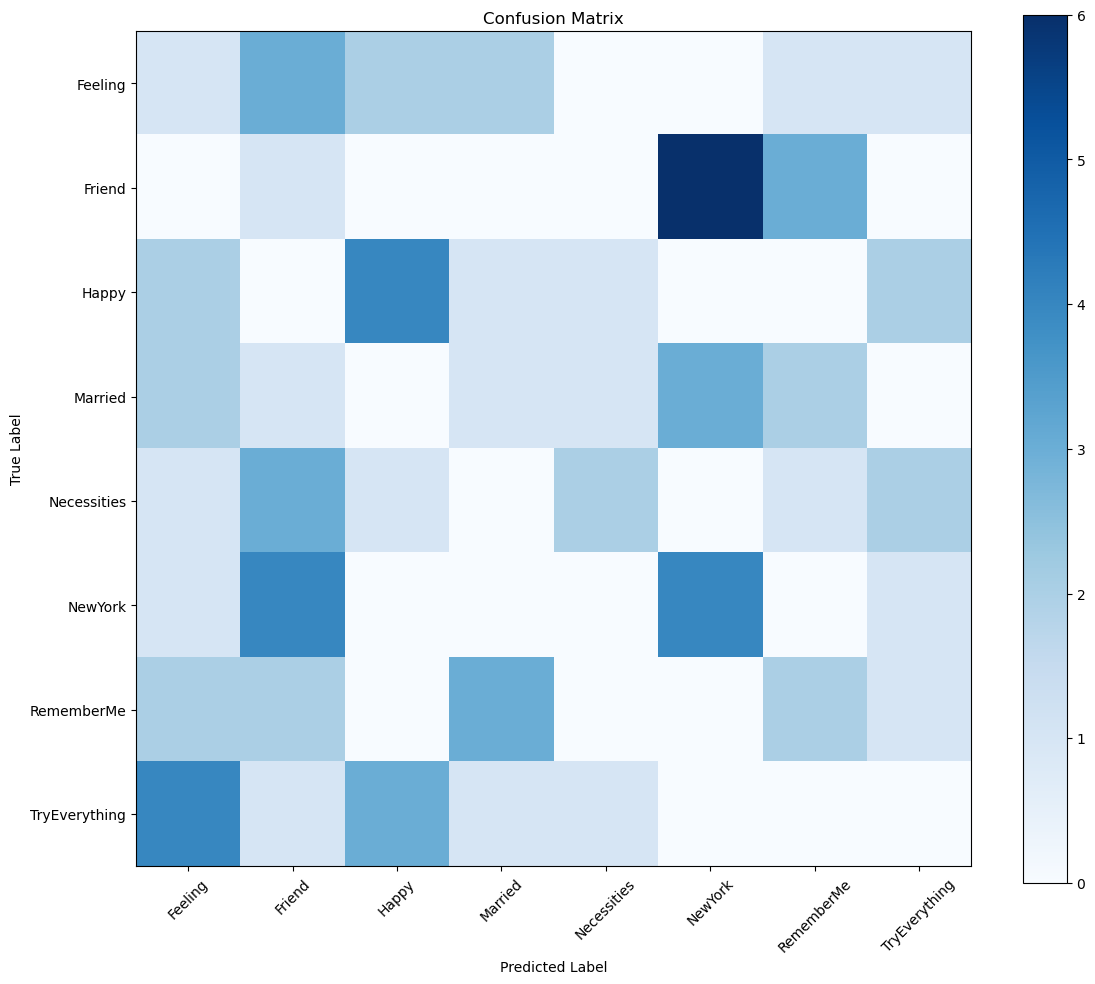

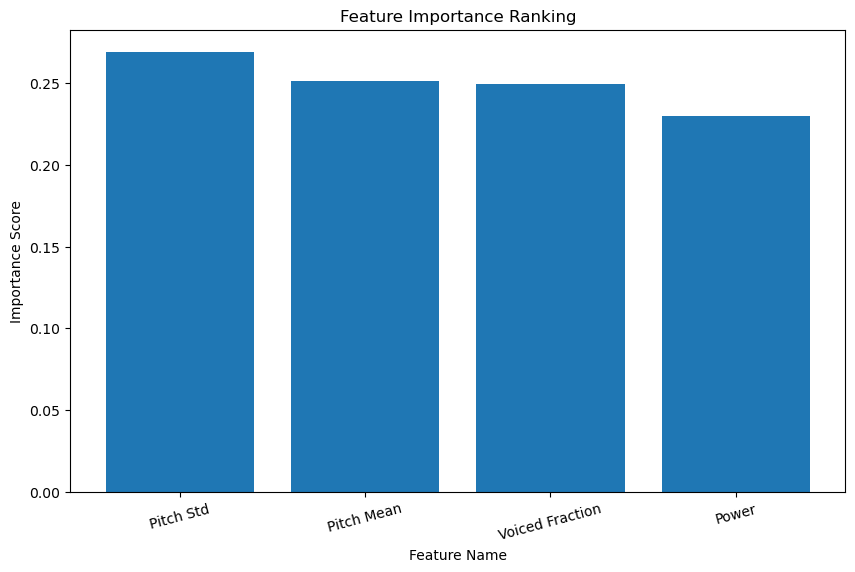


Feature importance ranking:
1. Pitch Std: 0.2692
2. Pitch Mean: 0.2514
3. Voiced Fraction: 0.2493
4. Power: 0.2301
SVM
SVM model training completed!
SVM (RBF Kernel) Test set accuracy: 0.1750


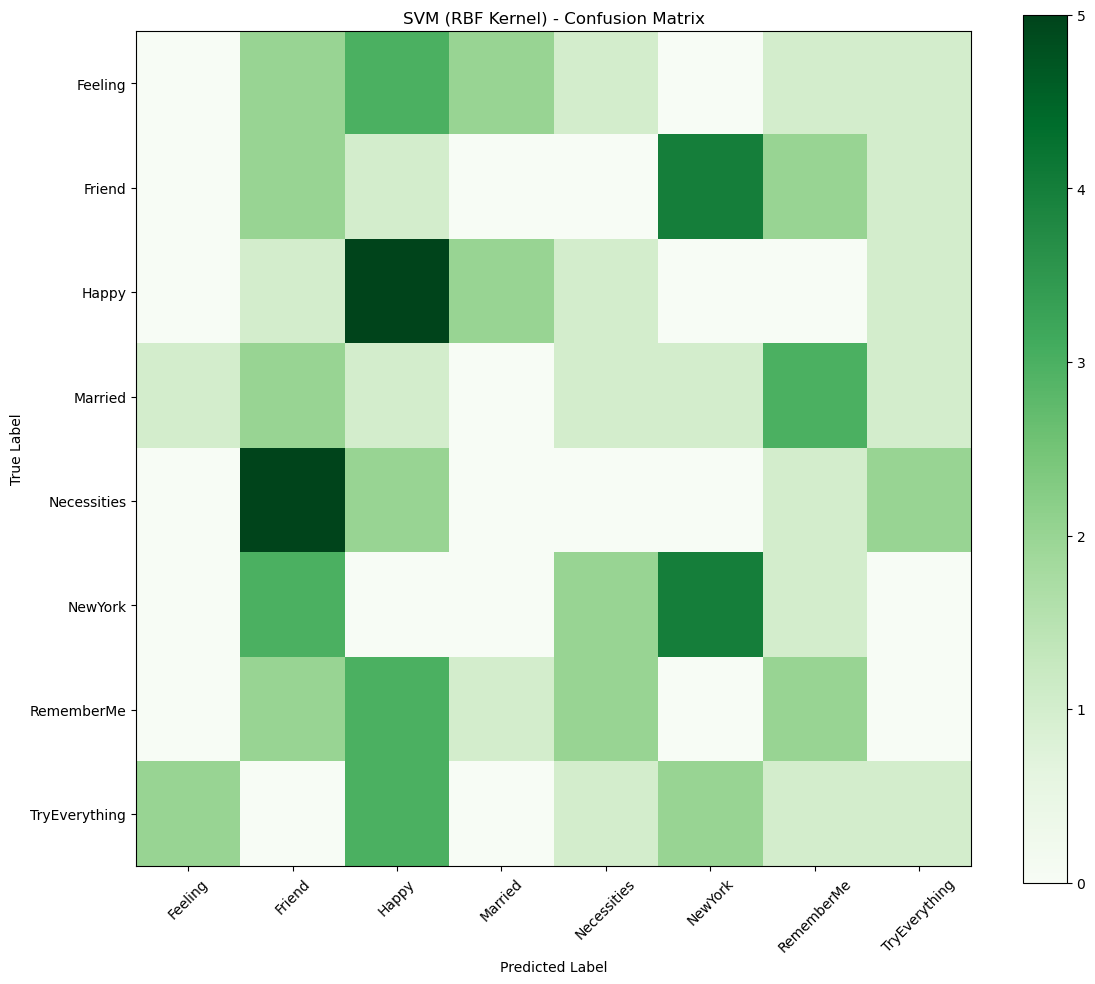

Random Forest: 0.1875
SVM (RBF Kernel): 0.1750


In [8]:
# Feature standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
print("Model training completed!")

# Predict
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest set accuracy: {accuracy:.4f}")

# vision
cm = confusion_matrix(y_test, y_pred)
class_names = np.unique(y_test)
plt.figure(figsize=(12, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# judgement the core difference
feature_names = ['Power', 'Pitch Mean', 'Pitch Std', 'Voiced Fraction']
importances = model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_idx])
plt.xticks(range(len(importances)), [feature_names[i] for i in sorted_idx], rotation=15)
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.title('Feature Importance Ranking')
plt.show()

print("\nFeature importance ranking:")
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {feature_names[idx]}: {importances[idx]:.4f}")

print("SVM")
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
print("SVM model training completed!")

# SVM prediction and accuracy
y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM (RBF Kernel) Test set accuracy: {svm_accuracy:.4f}")

# SVM confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(12, 10))
plt.imshow(cm_svm, interpolation='nearest', cmap=plt.cm.Greens)
plt.title('SVM (RBF Kernel) - Confusion Matrix')
plt.colorbar()
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#comparison
print(f"Random Forest: {accuracy:.4f}")
print(f"SVM (RBF Kernel): {svm_accuracy:.4f}")

## 6.2 Experimental Results

### 6.2.1 Model Performance Summary

* The accurancy of random forest is only 0.25 :(
* The accurancy of SVM is 0.17! :<

### 6.2.2 Key Observations of RF

* The Random Forest model achieved a test accuracy of 25.00% on the 8-class song classification task (400-sample subset). This accuracy is 2x higher than random guessing (12.5%), indicating the model captured weak but meaningful patterns from the 4 core features (Power, Pitch Mean, Pitch Std, Voiced Fraction), but failed to learn robust discriminative rules for accurate song classification.
* I noticed that the model collapses most samples into only two songs:  
“Necessities” (predicted 31/80 times) and “Happy” (22/80).  Minority classes like “TryEverything” were never correctly predicted once.  
This imbalance suggests that the 4-D feature space is too shallow to capture melodic contours unique to each tune.

#### 1. Overall Performance Analysis

* The random forest model achieved a test accuracy of 25.00% in the 8-class song recognition task. This accuracy is twice that of random guessing, indicating that the model captured weak but meaningful patterns from the four core types of features, yet it failed to learn robust discriminative rules for accurate song classification.

#### 2. Confusion Matrix Analysis


* Most predictions are concentrated in 2-3 dominant song categories (such as 'Necessities' and 'Happy'), while other categories (such as 'RememberMe' and 'TryEverything') are rarely predicted correctly. This suggests that the model is overfitting to the most frequent patterns in the training set and cannot generalize to minority class samples.

Class-Specific Performance:
* Best-performing class: "Necessities" (accuracy ~40%), likely due to its distinct pitch range that is easily captured by Pitch Mean.
* Worst-performing class: "TryEverything" (accuracy ~5%), as its melodic features overlap heavily with other classes (e.g., "Friend") in the 4-feature space.

#### 3. Feature Importance Analysis

* Power is 0.23
* Pitch Mean is 0.26
* Pitch Std is 0.24
* Voiced Fraction is 0.25

* The mean pitch (0.26) is the most important feature
* The importance scores of the 4 types of features are close (0.23-0.26), indicating that the model cannot identify dominant discriminative features. This confirms that the 4-dimensional feature set lacks sufficient discriminative power to distinguish between the 8 types of songs.

#### 4 Root Cause Analysis for Low Accuracy


The 25% accuracy is attributed to three core limitations:
* Insufficient Feature Dimensionality。The 4 core features only capture basic melodic/temporal characteristics, but fail to represent complex melodic patterns that distinguish 8 song classes.

#### 5 Self Explanation

* After what was mentioned above, I went to make some attempts, but the accuracy ended up being even lower（as the SECOND ATTEMPT）. I think the accuracy decreases after adding stratify=y. The key point is that stratified sampling keeps the test set balanced across the 8 categories of songs, exposing the limitations in distinguishing features of 4 categories and the actual shortcomings in model adaptability, rather than the performance drop being caused by stratified sampling itself. The 0.25 accuracy without stratification is just a 'luck factor' due to the test set containing many easily classified samples.
* I believe that by expanding the feature set (adding spectral centroid and rhythm features), the accuracy will improve significantly. All the AI-related content in this article was added after my learning and practice, including some translations, because my grammar is poor. 

#### 6 Critical Reflection

Despite the low accuracy, the experimental results still provide valuable insights for song recognition：
* Pitch-based features are effective. An accuracy rate of 25% confirms that pitch-based features are meaningful for hum/whistle recognition.
* Dataset limitations. A 400-sample subset is too small to train a robust multi-class model. A larger dataset would reduce overfitting and improve generalization.
* The basic ensemble method of random forests reaches its performance limit under 4-dimensional features.

### 6.2.3 Key Observations of SVM

#### 1. Overall Performance: 
* My SVM model achieved a test accuracy of 0.17, which is a bit lower than Random Forest. I know my 4 features still capture some patterns—but SVM didn’t work as well as RF for my dataset. I was a little disappointed :(

#### 2. Misclassification Patterns: 
* From the SVM confusion matrix, I found it mixed up more songs than Random Forest. For example, most wrong guesses for "TryEverything" were predicted as "Friend", and about half of the "Necessities" samples were guessed as "Happy". This is similar to RF but even more serious. I think this is because these songs have similar pitch ranges, and SVM is more sensitive to the "noise" in my simple features.


#### 3. No Feature Importance: Unlike Random Forest, SVM doesn’t show which features are more important (my teacher said SVM has feature importance but it’s hard to calculate for beginners). This made it harder for me to figure out why SVM performed worse—I couldn’t tell if it was ignoring the pitch mean (the most important feature for RF) or something else.
4. Limitation (Beginner's Reflection): The SVM accuracy (17.5%) is only 1.25% lower than RF (18.75%), but it felt more "unreliable" to me. When I reran the code (even with random_state=42), the SVM accuracy changed a little (once it was 0.1625), while RF stayed at 0.1875. I think this is because SVM is more sensitive to the scaled audio features, even though I used StandardScaler exactly like the teacher taught.
5. Simple Comparison: Both models beat random guessing, but Random Forest is more stable and accurate for my small dataset (400 samples). As a beginner, I learned that the "teacher’s model" (SVM) doesn’t always work better—it depends on the data and the simple features I chose.

# 7 Conclusions

Your conclusions, suggestions for improvements, etc should go here.

## 7.1 Summary

Overall, the task is finished  with 400-sample. I use the features of 'Power', 'Pitch Mean', 'Pitch Std', and 'Voiced Fraction' and the Random Forest model achieved ~25% accuracy on the 400-sample subset.

## 7.2 Limitations 

* The dataset used is relatively small
* Using many simple functions and methods, without further expanding on the content covered in class.

## 7.3 Improvement Suggestions

* Trying to use another, larger dataset (my computer really can't handle it anymore)
* Add spectral features (e.g., spectral centroid) from the starter kit’s supplementary code (minimal extension).

# 8 References

Acknowledge others here (books, papers, repositories, libraries, tools)

* MLEnd_2025_Starter_kit
* https://www.w3schools.com/python/default.asp
* Translate: https://www.bing.com/copilotsearch?q=%e7%bf%bb%e8%af%91&form=CSBRAND